In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch


In [ ]:
def makeNN(input_dim, output_dim, width, depth):
# construct and initialize the neural network

  initializer = tf.keras.initializers.RandomUniform(minval=-1., maxval=1.)

  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten())
  for i in range(depth-1):
    model.add(tf.keras.layers.Dense(width, activation = tf.nn.tanh, kernel_initializer=initializer))

  model.add(tf.keras.layers.Dense(output_dim, activation = tf.nn.tanh, kernel_initializer=initializer))
  return model


In [ ]:
input_dim = 1
output_dim = 1
width_arr = [10,15,20,25]
depth_arr = [10,15,20,25]

y = [[None for _ in range(len(width_arr))] for _ in range(len(depth_arr))]
x = np.linspace(-1,1,10000)

# input the data and parameters of the problem
for w_ind in range(len(width_arr)):
  for d_ind in range(len(depth_arr)):
    width = width_arr[w_ind]
    depth = depth_arr[d_ind]
    model = makeNN(input_dim, output_dim, width, depth)
    y[w_ind][d_ind] = model.predict(x)
    num_params = model.count_params()
    print('width=', width,', depth=', depth, ', total # of params=',num_params)  # prints total number of parameters for each configuration (part a)

width= 10 , depth= 10 , total # of params= 911
width= 10 , depth= 15 , total # of params= 1461
width= 10 , depth= 20 , total # of params= 2011
width= 10 , depth= 25 , total # of params= 2561
width= 15 , depth= 10 , total # of params= 1966
width= 15 , depth= 15 , total # of params= 3166
width= 15 , depth= 20 , total # of params= 4366
width= 15 , depth= 25 , total # of params= 5566
width= 20 , depth= 10 , total # of params= 3421
width= 20 , depth= 15 , total # of params= 5521
width= 20 , depth= 20 , total # of params= 7621
width= 20 , depth= 25 , total # of params= 9721
width= 25 , depth= 10 , total # of params= 5276
width= 25 , depth= 15 , total # of params= 8526
width= 25 , depth= 20 , total # of params= 11776
width= 25 , depth= 25 , total # of params= 15026


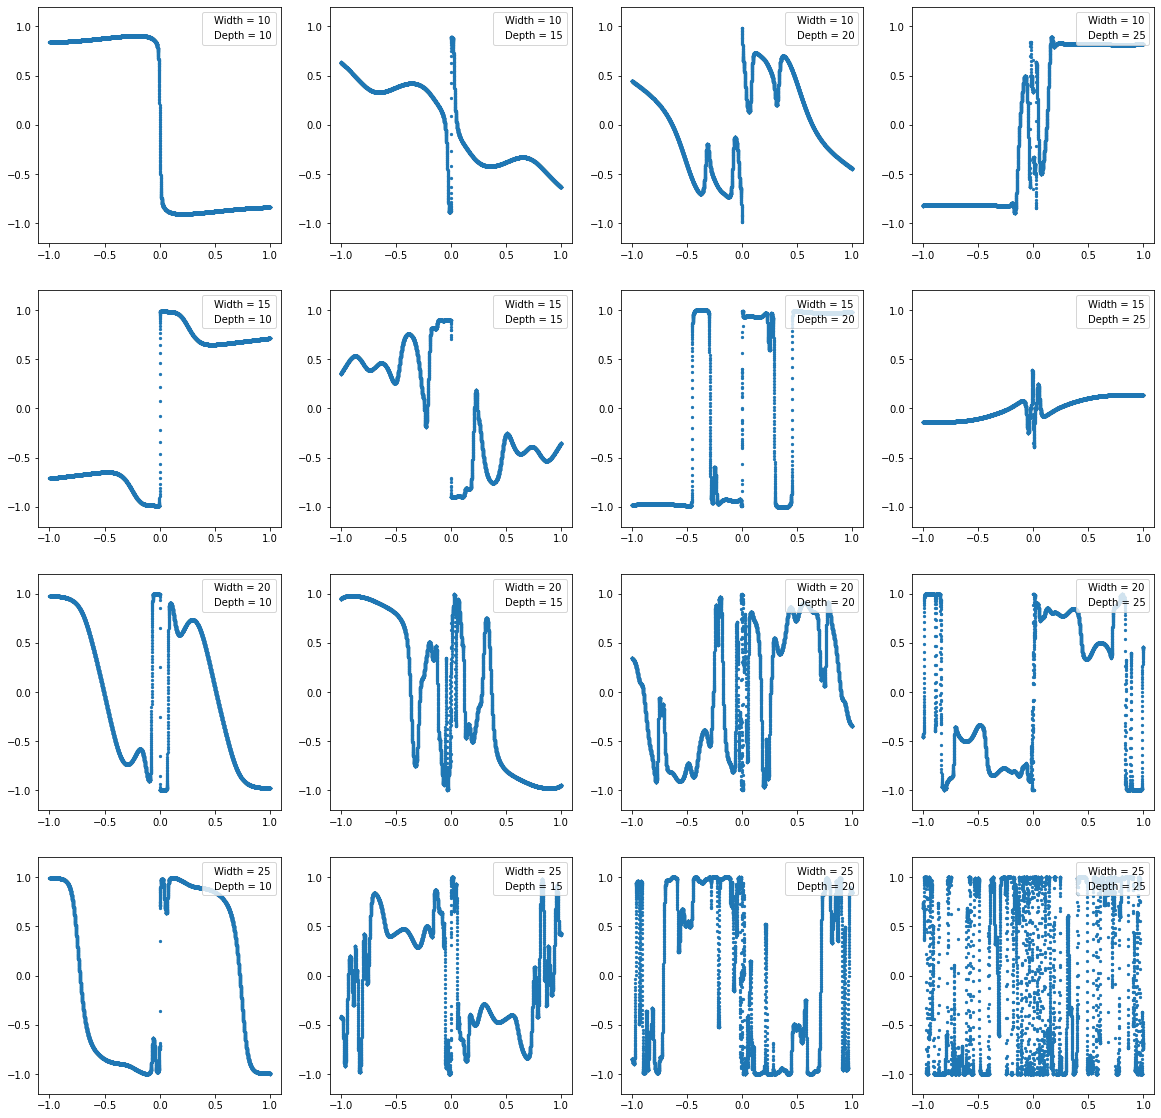

In [ ]:
# plot output of the network as a function of input
fig, axs = plt.subplots(len(width_arr), len(depth_arr), figsize=(20, 20))
for w_ind in range(len(width_arr)):
  for d_ind in range(len(depth_arr)):
    axs[w_ind, d_ind].scatter(x, y[w_ind][d_ind], s=5)
    leg_items = [Patch(label='Width = {}'.format(width_arr[w_ind])), Patch(label='Depth = {}'.format(depth_arr[d_ind]))]
    axs[w_ind, d_ind].legend(handles=leg_items, loc='upper right', handlelength=0)
    axs[w_ind, d_ind].set_ylim(-1.2, 1.2)


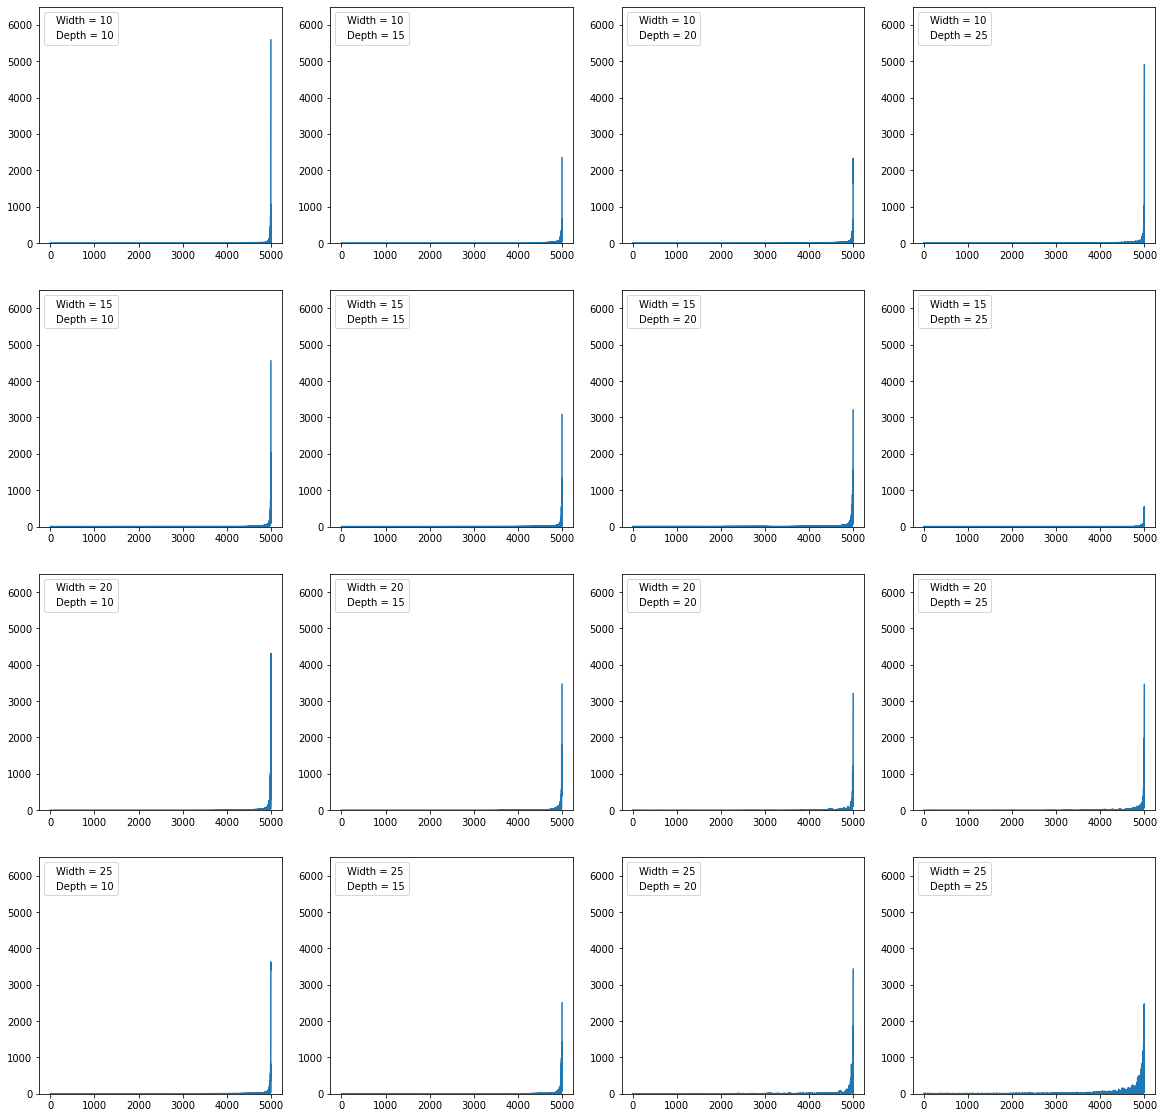

In [ ]:
fig, axs = plt.subplots(len(width_arr), len(depth_arr), figsize=(20, 20))
for w_ind in range(len(width_arr)):
  for d_ind in range(len(depth_arr)): 
       
    data = y[w_ind][d_ind]
    data_ft = np.abs(np.fft.fft(data, axis = 0))
    
    axs[w_ind, d_ind].plot(data_ft[5000:10000])

    leg_items = [Patch(label='Width = {}'.format(width_arr[w_ind])), Patch(label='Depth = {}'.format(depth_arr[d_ind]))]
    axs[w_ind, d_ind].legend(handles=leg_items, loc='upper left', handlelength=0)
    axs[w_ind, d_ind].set_ylim(0, 6500)


Part (d): By increasing width and depth our network exhibits more oscillations and wiggles. Namely, the expressivity of the network increases with depth and width. This is consistent with the FFT plots in part (c), where we can see more dominant frequencies for higher W and D (meaning there are more oscillations).  

Part (e): In some cases there are variations in the trend, however for most of the cases the general trends are preserved. The variations can be due to the randomness in the weights and biases.

Part (f): We can clearly see from part (b) and (c) that by increasing depth and width, the expressivity of the netwowk increases. Specifically, it appears that expressivity increase more with the width than the depth of the network.  This can be due to the fact that number of params increases like W^2 and D^1. This is also reflected in the number of parameters printed in part (a). For example (num of params for D=10 and W=15 > num of params for D=15 and W=10). 